In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from umap import UMAP

random_state = 43
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# sns.set_theme(context="paper", style="ticks")

Load data


In [2]:
test = pd.read_csv("data\\test.csv")
train = pd.read_csv("data\\train.csv")

train_X = train.drop("label", axis=1)
train_y = train["label"]

Embed data using umap


In [3]:
# reducer = UMAP(
#     local_connectivity=1,
#     n_neighbors=30,
#     n_components=10
# )

Train Random Forest classifier


In [4]:
# classifier = RandomForestClassifier()

# pipe = make_pipeline(
#     reducer,
#     classifier
# )

# pred = pipe.fit(
#     X=train_X,
#     y=train_y
#     ).predict(test)

save predictions


In [5]:
# 97% Accuracy

# submission = pd.DataFrame(columns=["ImageId", "Label"], data=zip(test.index+1, pred))
# submission.to_csv("submission.csv", index=False)

# Outlier Detection


In [6]:
# Classification
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV

In [7]:
estimators = [
    # ("knnc", KNeighborsClassifier(
    #     weights="distance",
    #     n_neighbors=40,
    #     n_jobs=-1
    # )),
    ("gnb", GaussianNB()),
    # ("gpc", GaussianProcessClassifier(
    #     random_state=random_state,
    #     warm_start=True
    # )),
    # ("rfc", RandomForestClassifier(
    #     random_state=random_state,
    #     class_weight="balanced_subsample",
    #     n_jobs=-1
    # )),
    # ("SVC", LinearSVC(
    #     # max_iter=1000,
    #     random_state=random_state
    # ))
]

final_estimator = LogisticRegressionCV(
    max_iter=1000,
    # solver="liblinear"
)

In [8]:
reducer = UMAP(
    n_neighbors=50,
    n_components=2,
    min_dist=0,
    # metric="correlation",
    unique=True,
)

class_comp = StackingClassifier(
    estimators=estimators,
    # final_estimator=final_estimator,
    n_jobs=-1,
    verbose=0,
)

pipe2 = make_pipeline(reducer, class_comp).fit(X=train_X, y=train_y)

In [9]:
proba = pipe2.predict_proba(test)
pred_y = pipe2.predict(test)
entropy = -np.sum(np.log2(proba) * proba, axis=1)

In [10]:
entropy.max()

1.4074595456432575

In [11]:
entropy.shape

(28000,)

<AxesSubplot:ylabel='Count'>

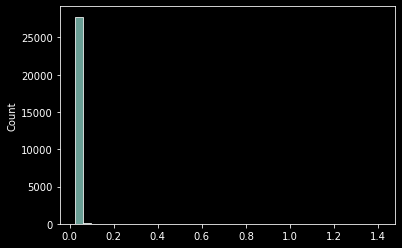

In [12]:
sns.histplot(data=entropy, bins=40)

In [20]:
ix = np.argmax(entropy)

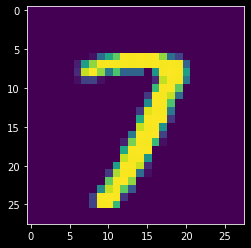

In [21]:
plt.imshow(test.iloc[ix].to_numpy().reshape(28, 28))

In [22]:
pred_y[ix]

5

In [23]:
proba[ix].round(2)

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.56, 0.01, 0.01, 0.39, 0.01])

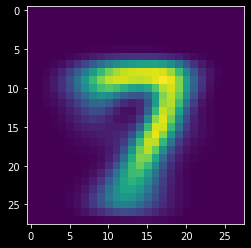

In [24]:
plt.imshow(train_X[train_y == 7].mean().to_numpy().reshape(28, 28))

<AxesSubplot:>

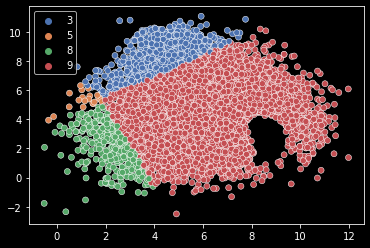

In [18]:
test_embedding = pipe2[:1].transform(test)

sns.scatterplot(
    x=test_embedding[:, 0], y=test_embedding[:, 1], hue=pred_y, palette="deep"
)

<AxesSubplot:>

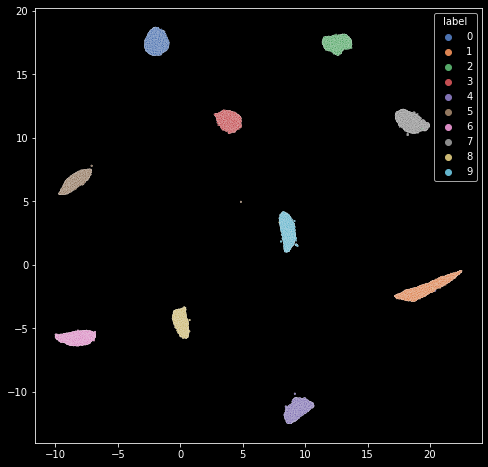

In [19]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=pipe2["umap"].embedding_[:, 0],
    y=pipe2["umap"].embedding_[:, 1],
    hue=train_y,
    palette="deep",
    s=3,
)